In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
from sklearn.cluster import KMeans
from sklearn.cluster import k_means

实现实验1.2中L2和Kmeans两个函数的相关功能，并且基于samples数据输出 k=3 的聚类结果。（结果在下下段显示）

In [2]:
def L2(vecXi, vecXj):
    '''
    计算欧氏距离
    para vecXi：点坐标，向量
    para vecXj：点坐标，向量
    retrurn: 两点之间的欧氏距离
    '''
    dist = 0
    for i, j in zip(vecXi, vecXj):
        dist += (i - j) ** 2
    dist = dist ** 0.5
    return dist

In [3]:
def kMeans(S, k, distMeas=L2):
    '''
    K均值聚类
    para S：样本集，多维数组
    para k：簇个数
    para distMeas：距离度量函数，默认为欧氏距离计算函数
    return sampleTag：一维数组，存储样本对应的簇标签
    return clusterCents：一维数组，各簇中心
    retrun SSE:误差平方和
    '''
    #初始化
    m = len(S)
    sampleTag = np.empty(m, dtype=int)
    clusterCents = np.empty([k, 2])
    for i in range(k):
        r = randint(0, m-1)
        clusterCents[i] = S[r]
    SSE = 0
    SSEnext = 1
    #print(clusterCents)

    while(SSE != SSEnext):
        #分配
        for i in range(m):
            min_dist = 1000
            for j in range(k):
                dist = distMeas(S[i], clusterCents[j])
                if dist < min_dist:
                    sampleTag[i] = j
                    min_dist = dist
        #print(sampleTag)
        #更新簇中心
        for i in range(k):
            new_pos = np.array([0, 0])
            num = 0
            for s, st in zip(S, sampleTag):
                if st == i:
                    new_pos = np.add(new_pos, s)
                    num += 1
            if num != 0:
                new_pos[0] = new_pos[0] / num
                new_pos[1] = new_pos[1] / num
            clusterCents[i] = new_pos
        #print(clusterCents)
        #更新误差平方和
        SSE = SSEnext
        SSEnext = 0
        for s in S:
            min_dist = 1000
            for i in range(k):
                dist = distMeas(s, clusterCents[i])
                if dist < min_dist:
                    min_dist = dist
            SSEnext += min_dist
        #print(SSE)
    
    return clusterCents, sampleTag, SSE

In [4]:
samples = np.array([
    [ 8.76474369, 14.97536963],
    [ 4.54577845, 7.39433243],
    [ 5.66184177, 10.45327224],
    [ 6.02005553, 18.60759073],
    [12.56729723, 5.50656992],
    [ 4.18694228, 14.02615036],
    [ 5.72670608, 8.37561397],
    [ 4.09989928, 14.44273323],
    [ 2.25717893, 1.97789559],
    [ 4.66913545, 0.77178038] ,
    [ 8.1219476, 0.79762128] ,
    [ 0.07972278, -1.9386662 ],
    [ 8.37004706, 10.77781799] ,
    [ 6.6809732, 15.53118858] ,
    [ 5.99194694, 16.57732864] ,
    [ 5.64199016, 15.54671014],
    [-2.92514764, 11.0884457 ],
    [ 4.99694961, 1.98673206] ,
    [ 3.8665841, -1.75282591] ,
    [ 2.62642744, 22.08897582] ,
    [ 5.65622583, 14.77736975] ,
    [-0.33882279, 5.56931142] ,
    [10.93574482, 11.24487206] ,
    [ 4.65023576, 12.78869503] ,
    [ 8.49848513, 9.78769711] ,
    [ 7.53046709, 8.50232567] ,
    [ 6.17118371, 21.74394049] ,
    [-0.93339496, 1.59414249] ,
    [-6.37700491, 3.46389409] ,
    [ 7.13598091, 14.17794597]
    ])

调用sk-learn库的kmeans算法，和自己实现的kmeans做对比，将samples数据的聚类结果分别用
matplotlib库进行可视化。

自己实现的kmeans如下：
[[ 7.97954595  9.00531267]
 [ 5.63555039 16.27366653]
 [ 1.34171482  2.35583309]]
[1 0 0 1 0 1 0 1 2 2 2 2 0 1 1 1 2 2 2 1 1 2 0 1 0 0 1 2 2 1]


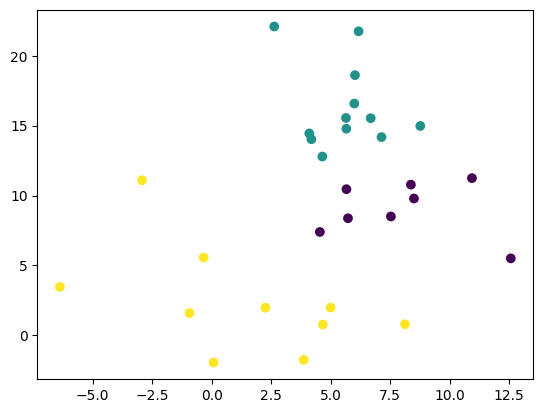

sk-learn库的kmeans如下：
[[ 1.34171482  2.35583309]
 [ 7.97954595  9.00531267]
 [ 5.63555039 16.27366653]]
[2 1 1 2 1 2 1 2 0 0 0 0 1 2 2 2 0 0 0 2 2 0 1 2 1 1 2 0 0 2]


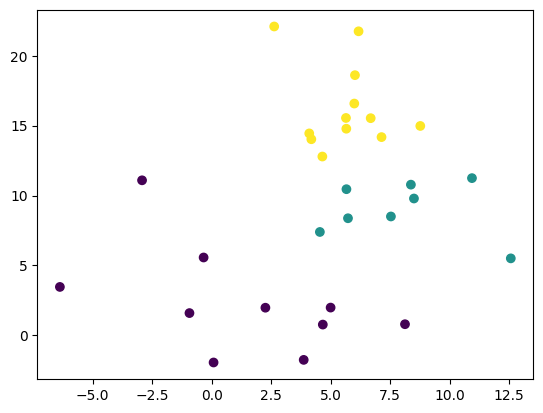

In [5]:
#自己实现的kmeans算法
k = 3
clusterCents, sampleTag, SSE = kMeans(samples, k)
print("自己实现的kmeans如下：")
print(clusterCents)
print(sampleTag)
plt.scatter(samples[:, 0], samples[:, 1], c=sampleTag)
plt.show()
#sk-learn库的kmeans算法
centroid, label, inertia = k_means(samples, n_clusters=3, init='random', n_init=10, random_state=0)
print("sk-learn库的kmeans如下：")
print(centroid)
print(label)
plt.scatter(samples[:, 0], samples[:, 1], c=label)
plt.show()

基于city.xls文件，调用自己实现的kmeans算法，实现聚类。给出寻找最佳簇数，确定合适的k值的
实现代码

k为 2 时SSE如下：
23629.84088447008
k为 3 时SSE如下：
20594.76011157925
k为 4 时SSE如下：
17115.097321524252
k为 5 时SSE如下：
14156.179476019886
k为 6 时SSE如下：
12935.52691402517
k为 7 时SSE如下：
11700.137725594279
k为 8 时SSE如下：
10990.920110920999
k为 9 时SSE如下：
10397.527277521966
经数值计算k的最佳值为 5
SSE数据如下：


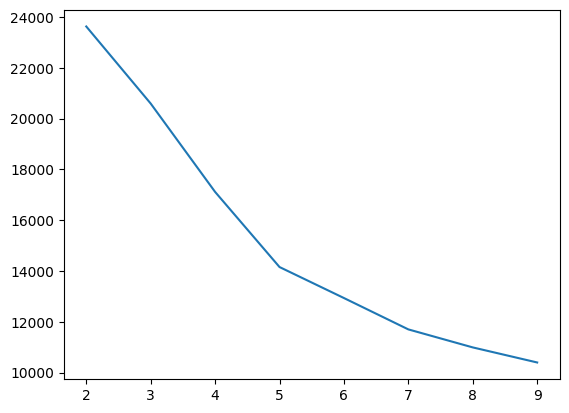

经图像观察k的最佳值为 5
故k的最佳值取 5 ，此时数据如下：
[[115.81715556  27.45775556]
 [125.17465565  44.22545455]
 [ 85.89494318  38.0925    ]
 [104.38314548  29.65245085]
 [114.50723644  36.67721597]]
[4 4 4 ... 0 0 0]


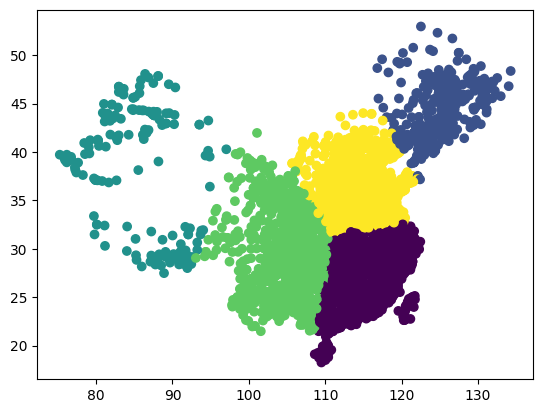

In [6]:
#读取经纬度数据
data = np.array(pd.read_excel(io=r"city.xls", usecols=["经度","纬度"]))
data = data[~np.isnan(data).any(axis=1)]
k_star = 2
k_end = 10
#print(data)
#聚类并寻找最佳k
clusterCents_list = []
sampleTag_list = []
SSE_list = []
SSE_d1 = []
SSE_d2 = []

for k in range(k_star, k_end):
    clusterCents, sampleTag, SSE = kMeans(data, k)
    clusterCents_list.append(clusterCents)
    sampleTag_list.append(sampleTag)
    SSE_list.append(SSE)
    print("k为", k, "时SSE如下：")
    print(SSE)
#数值计算求最佳k
for i in range(len(SSE_list) - 1):
    SSE_d1.append((SSE_list[i] - SSE_list[i + 1]) / 2)
for i in range(len(SSE_d1) - 2):
    SSE_d2.append((SSE_d1[i] - SSE_d1[i + 1]) / 2)
k_math = SSE_d2.index(max(SSE_d2)) + k_star + 1
print("经数值计算k的最佳值为", k_math)
#图像观察求最佳k
print("SSE数据如下：")
plt.plot(range(k_star, k_end), SSE_list)
plt.show()
k_graph = 5
print("经图像观察k的最佳值为", k_graph)
#综合
k_best = 5
print("故k的最佳值取", k_best, "，此时数据如下：")
print(clusterCents_list[k_best - k_star])
print(sampleTag_list[k_best - k_star])
plt.scatter(data[:, 0], data[:, 1], c=sampleTag_list[k_best - k_star])
plt.show()

将city数据聚类结果与sk-learn库的kmeans++结果进行对比，并分别可视化（这里展示sk库的结果，我的算法结果如上）

k为 2 时SSE如下：
247672.09888396593
k为 3 时SSE如下：
161528.57025693494
k为 4 时SSE如下：
111983.18096035557
k为 5 时SSE如下：
78992.41217090537
k为 6 时SSE如下：
64452.24684479362
k为 7 时SSE如下：
54151.23104748726
k为 8 时SSE如下：
46273.84040439249
k为 9 时SSE如下：
41051.00586047498
经数值计算k的最佳值为 3
SSE数据如下：


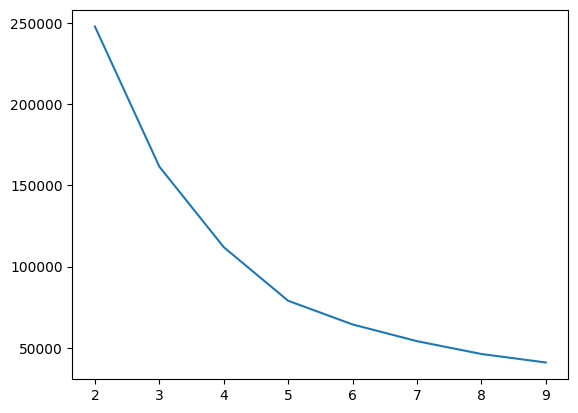

经图像观察k的最佳值为 3
故k的最佳值取 3 ，此时数据如下：
[[109.41262042  28.7188632 ]
 [118.75967236  37.78497863]
 [ 88.14325688  37.44577982]]
[1 1 1 ... 0 0 0]


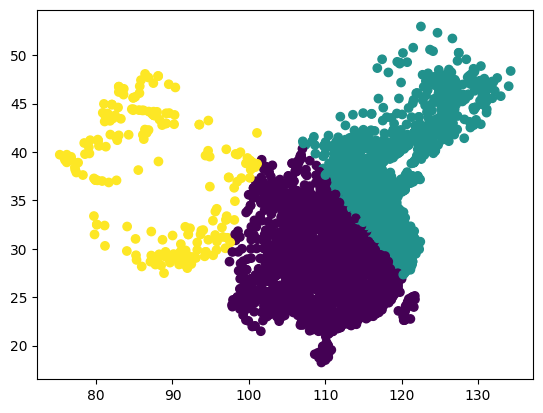

In [7]:
#聚类并寻找最佳k
clusterCents_list = []
sampleTag_list = []
SSE_list = []
SSE_d1 = []
SSE_d2 = []

for k in range(2, 10):
    clusterCents, sampleTag, SSE = k_means(data, n_clusters=k, init='k-means++', n_init=10, random_state=0)
    clusterCents_list.append(clusterCents)
    sampleTag_list.append(sampleTag)
    SSE_list.append(SSE)
    print("k为", k, "时SSE如下：")
    print(SSE)
#数值计算求最佳k
for i in range(len(SSE_list) - 1):
    SSE_d1.append((SSE_list[i] - SSE_list[i + 1]) / 2)
for i in range(len(SSE_d1) - 2):
    SSE_d2.append((SSE_d1[i] - SSE_d1[i + 1]) / 2)
k_math = SSE_d2.index(max(SSE_d2)) + k_star + 1
print("经数值计算k的最佳值为", k_math)
#图像观察求最佳k
print("SSE数据如下：")
plt.plot(range(k_star, k_end), SSE_list)
plt.show()
k_graph = 3
print("经图像观察k的最佳值为", k_graph)
#综合
k_best = 3
print("故k的最佳值取", k_best, "，此时数据如下：")
print(clusterCents_list[k_best - k_star])
print(sampleTag_list[k_best - k_star])
plt.scatter(data[:, 0], data[:, 1], c=sampleTag_list[k_best - k_star])
plt.show()

使用自己实现的kmeans算法对任意一张图片进行聚类，展示聚类结果

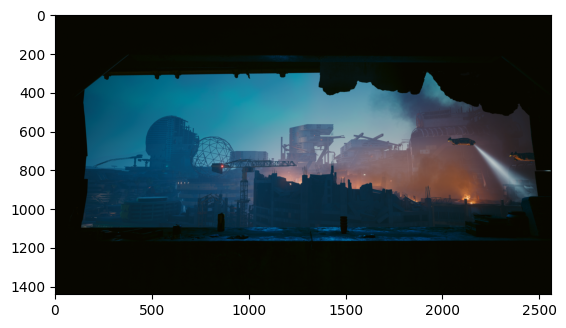

In [8]:
import os
from matplotlib import image as mpimg
#原图直出（）
img_path = os.path.join(os.getcwd(),'syberpunk.png')
img = mpimg.imread(img_path)
plt.imshow(img)
plt.show()

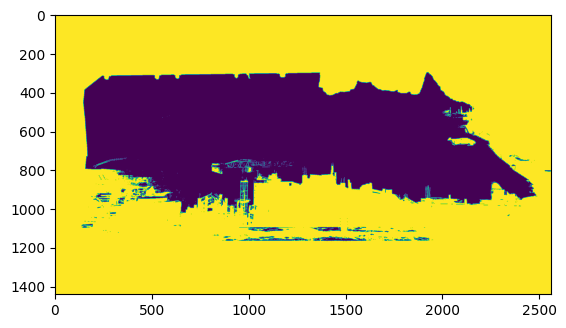

In [9]:
#展开图像
imgData = img.reshape((-1, 4))
#聚类分析和结果可视化
km = KMeans(n_clusters=2)
labels = km.fit_predict(imgData)
img_class = labels.reshape(img.shape[:2])
plt.imshow(img_class)
plt.show()

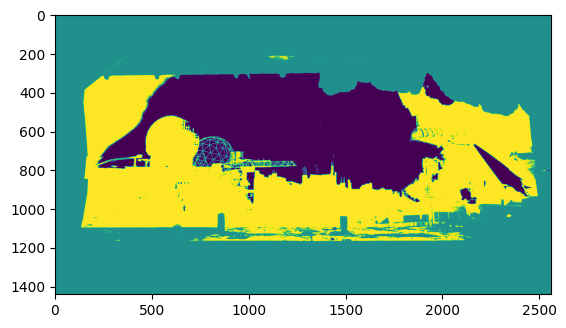

In [10]:
#展示一下分成3类的图
km = KMeans(n_clusters=3)
labels = km.fit_predict(imgData)
img_class = labels.reshape(img.shape[:2])
plt.imshow(img_class)
plt.show()